# A demo process for parameter guidelines
## Overview
1. user uploads their data and choose a target
2. process shows the feature importance for the chosen target
3. user chooses which attributes to mark
4. the process fingerprints the data
5. the process shows the obtained utility via mean, variance and performance on different ML classifiers as a function of number of marks
6. the process shows robustness against the attacks as a function of number of marks

(ideally, the process now finds some correlations between the dataset characteristics and obtained quality)

In [1]:
import os
import pandas as pd

In [2]:
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [3]:
from datasets import BreastCancerWisconsin

In [4]:
data = BreastCancerWisconsin().load()  # todo: fix this pls

In [5]:
data.head()

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# what's the target?
target = 'class'

In [7]:
# todo: feature importance

In [8]:
# which attributes (not) to fingerprint? (except, obviously, target)
exclude = ['sample-code-number']

In [9]:
from scheme import AKScheme

In [10]:
gamma = 1
xi = 1
fplen = 8
sk = 343
numbuyers = 10

In [11]:
scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
fingerprinted_data = scheme.insertion(data, 1, exclude=[target])

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 88 times
Time: <1 sec.


In [12]:
fingerprinted_data

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,9,8,1,3,4,3,7,1,2
4,1017023,5,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,0,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,0,4


In [13]:
# todo: implement some kind of summary or show differences or something like that
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Marked values per column')

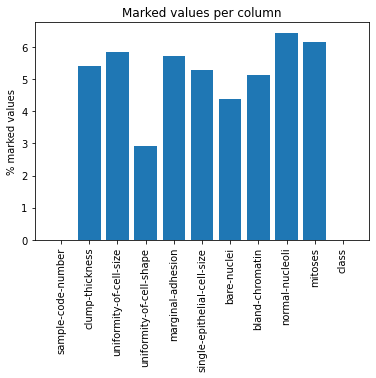

In [14]:
percentage = {}
for index in range(len(data.columns)):
    original = data[data.columns[index]]
    fingerprinted = fingerprinted_data[data.columns[index]]
    num_of_changes = len(original.compare(fingerprinted))
    percentage[data.columns[index]] = (num_of_changes / len(data)) * 100
plt.bar(percentage.keys(), percentage.values())
plt.xticks(rotation=90)
plt.ylabel('% marked values')
plt.title('Marked values per column')

In [15]:
import numpy as np

In [16]:
# change in mean
mean_original = [np.mean(data[attribute]) for attribute in data]
mean_fingerprint = [np.mean(fingerprinted_data[attribute]) for attribute in fingerprinted_data]
delta_mean = [fp - org for fp, org in zip(mean_fingerprint, mean_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

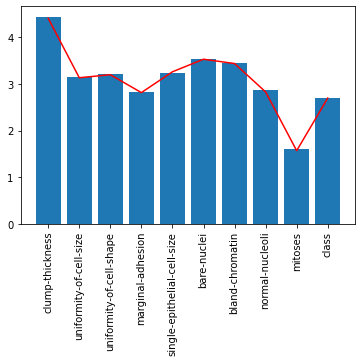

In [17]:
plt.plot(mean_fingerprint[1:], color='red')
plt.bar(data.columns[1:], mean_original[1:])
plt.xticks(rotation=90)

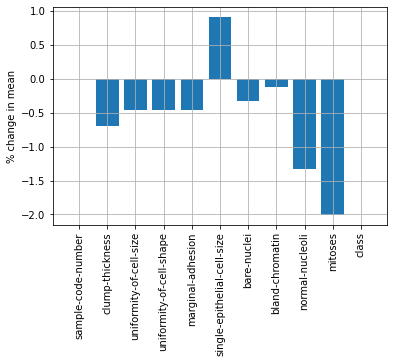

In [18]:
plt.bar(data.columns, [(diff/mean)*100  for diff, mean in zip(delta_mean, mean_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in mean')
plt.grid()

In [19]:
# change in variance
var_original = [np.var(data[attribute]) for attribute in data]
var_fingerprint = [np.var(fingerprinted_data[attribute]) for attribute in fingerprinted_data]
delta_var = [fp - org for fp, org in zip(var_fingerprint, var_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

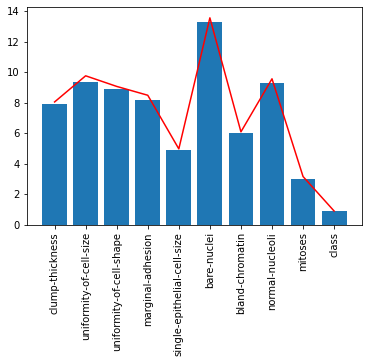

In [20]:
plt.plot(var_fingerprint[1:], color='red')
plt.bar(data.columns[1:], var_original[1:])
plt.xticks(rotation=90)

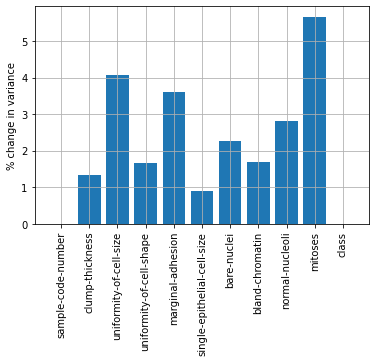

In [21]:
plt.bar(data.columns, [(diff/var)*100  for diff, var in zip(delta_var, var_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in variance')
plt.grid()

## Utility as ML performance
Classifiers:
1. Decision Tree
2. Logistic Regression
3. SVM 
4. Boosting algorithm
5. Random Forest
6. KNN

We do only the necessary preprocessing (categorical to numerical, normalization where necessary). 
- how do we know that this properly reflects the behaviour? We don't but we assume. 
- how to actually choose the baseline? Should we do a minimal random/grid search for the hyperparameters? Probably a good idea. 

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [23]:
model = DecisionTreeClassifier(random_state=0)

In [24]:
X = data.drop([target, 'sample-code-number'], axis=1)
y = data[target]

In [25]:
# performance on the original data via 5-fold cross validation
print(cross_val_score(model, X, y, cv=5))

[0.91240876 0.9270073  0.94890511 0.96323529 0.93382353]


In [26]:
X_fp = fingerprinted_data.drop([target, 'sample-code-number'], axis=1)
y_fp = fingerprinted_data[target]

In [27]:
from utils import *

In [28]:
fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)

{'fit_time': array([0.0100069 , 0.0040009 , 0.00399017, 0.00299954, 0.00500274]),
 'score_time': array([0.00298929, 0.00404644, 0.00099993, 0.00099993, 0.00099683]),
 'test_score': array([0.91970803, 0.91970803, 0.95620438, 0.95588235, 0.94117647])}

In [29]:
data['uniformity-of-cell-size'].compare(fingerprinted_data['uniformity-of-cell-size'])

,self,other
3,8.0,9.0
19,1.0,0.0
25,2.0,3.0
34,1.0,0.0
37,4.0,5.0
41,6.0,7.0
50,3.0,2.0
77,1.0,0.0
83,10.0,11.0
168,6.0,7.0


In [30]:
print(cross_val_score(model, X, y, cv=5))

[0.91240876 0.9270073  0.94890511 0.96323529 0.93382353]


## Robusntes against preprocessing methods

## Robustness against classical attacks